Instructions:
1. Choose a unique dataset from: https://archive.ics.uci.edu
2. Your dataset should be unique from your classmates otherwise no points will be given for this exercise.
### Complete the Tasks in bold

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# Fetch dataset 
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890) 
  
# Data (as pandas dataframes) 
X = aids_clinical_trials_group_study_175.data.features 
y = aids_clinical_trials_group_study_175.data.targets 
  
# Metadata 
print(aids_clinical_trials_group_study_175.metadata) 
  
# Variable information 
print(aids_clinical_trials_group_study_175.variables) 


{'uci_id': 890, 'name': 'AIDS Clinical Trials Group Study 175', 'repository_url': 'https://archive.ics.uci.edu/dataset/890/aids+clinical+trials+group+study+175', 'data_url': 'https://archive.ics.uci.edu/static/public/890/data.csv', 'abstract': 'The AIDS Clinical Trials Group Study 175 Dataset contains healthcare statistics and categorical information about patients who have been diagnosed with AIDS. This dataset was initially published in 1996. The prediction task is to predict whether or not each patient died within a certain window of time or not. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 2139, 'num_features': 23, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Sexual Orientation', 'Race', 'Gender'], 'target_col': ['cid'], 'index_col': ['pidnum'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1996, 'last_updated': 'Fri Nov 

## Data Exploration

**TASK: Create a correlation heatmap.**

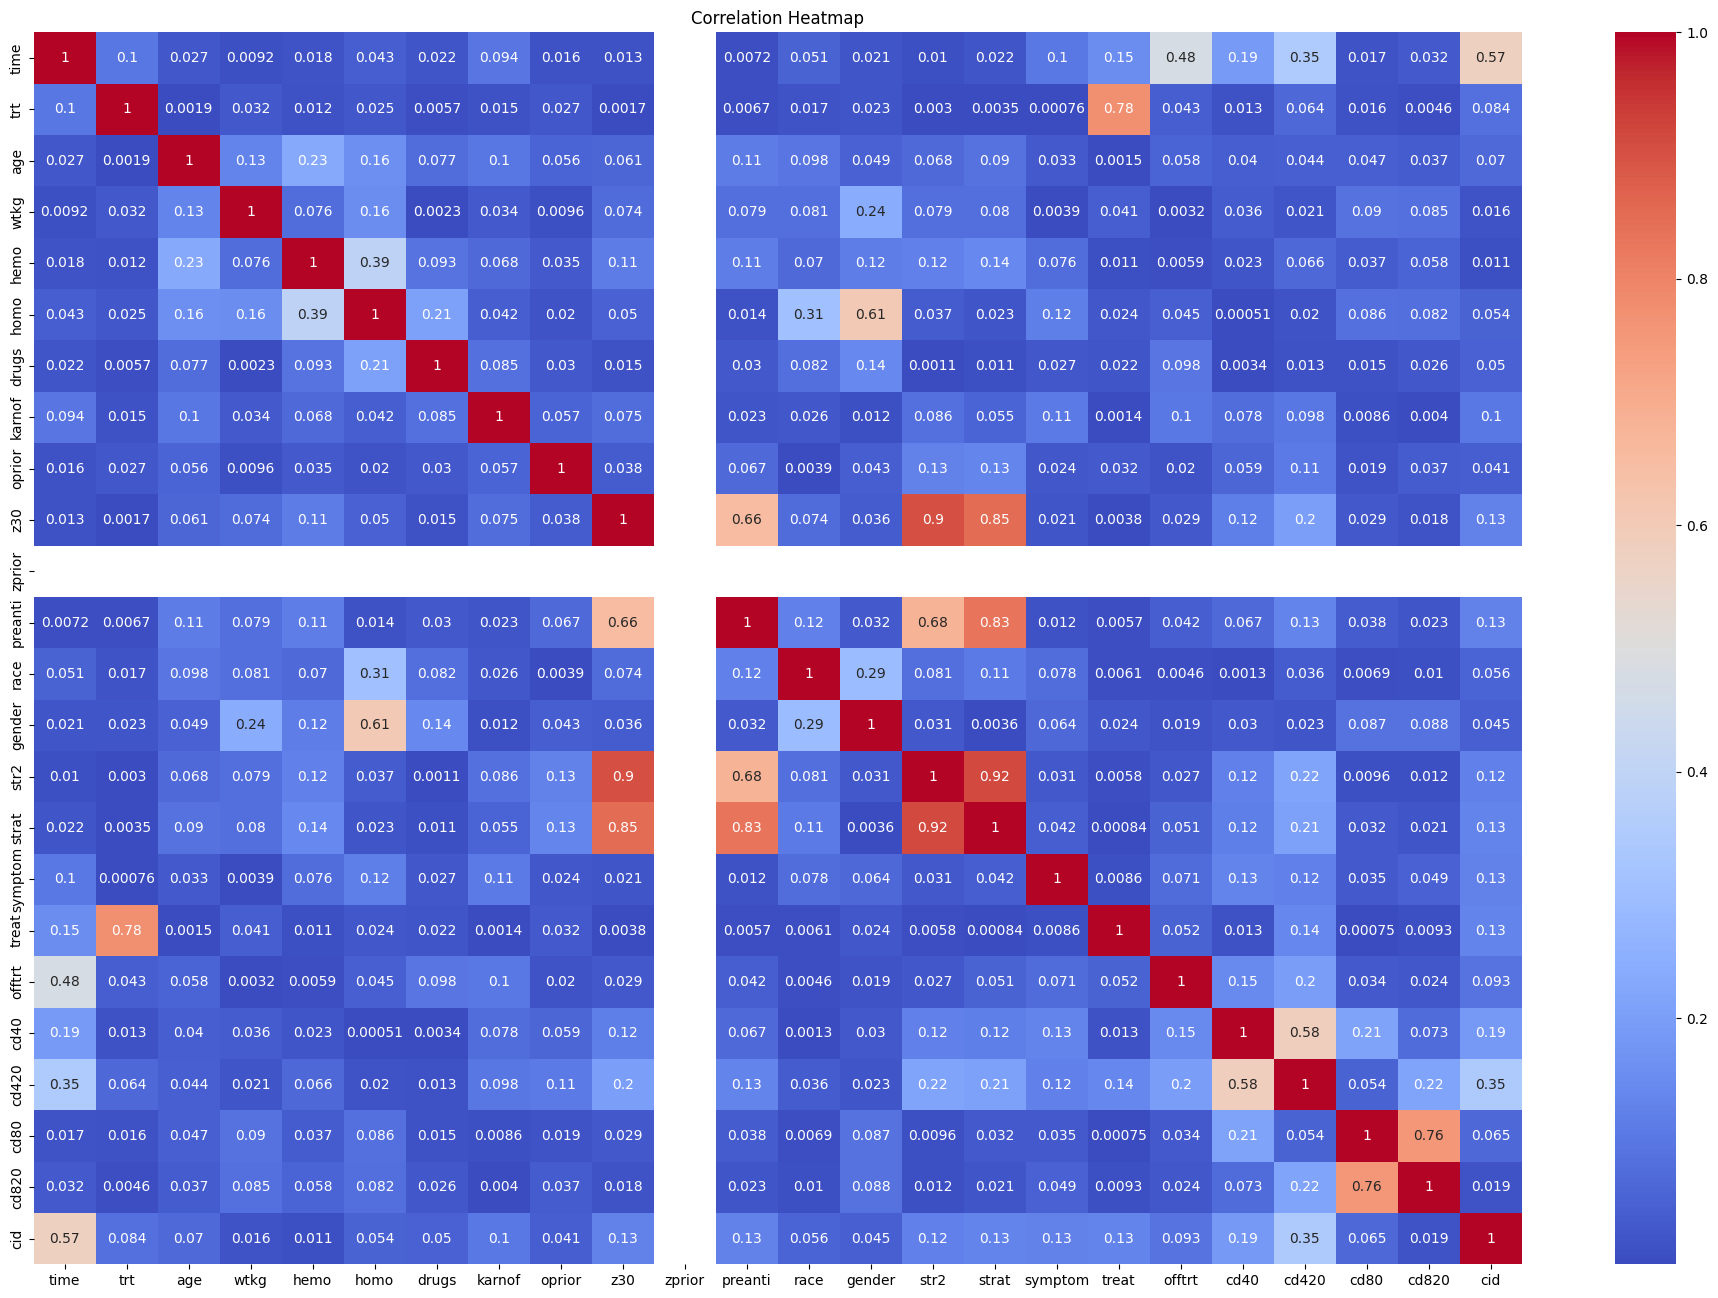

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine features and target into one dataframe for correlation
data = pd.concat([X, y], axis=1)

# Create a correlation matrix
corr_matrix = data.corr().abs()

# Plot the heatmap
plt.figure(figsize=(24, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [5]:
# Calculate the absolute correlations with the target
target_correlations = corr_matrix[y.columns[0]].drop(y.columns[0])

# Get the top 5 correlated features
top_5_correlated = target_correlations.nlargest(5)
print("Top 5 correlated features with the target:")
print(top_5_correlated)


Top 5 correlated features with the target:
time     0.574989
cd420    0.345908
cd40     0.185647
strat    0.131441
treat    0.129560
Name: cid, dtype: float64


## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: Do not forget to put a random_state for reproducibility.*

In [6]:
from sklearn.model_selection import train_test_split

# Split the data into features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])


**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [8]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'knn__n_neighbors': range(1, 31)}

# Perform the grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Report the best parameters
print("Best parameters found: ", grid_search.best_params_)


c:\Users\Predator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Predator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Predator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Predator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classificat

Best parameters found:  {'knn__n_neighbors': 7}


c:\Users\Predator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Predator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Predator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Predator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classificat

**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

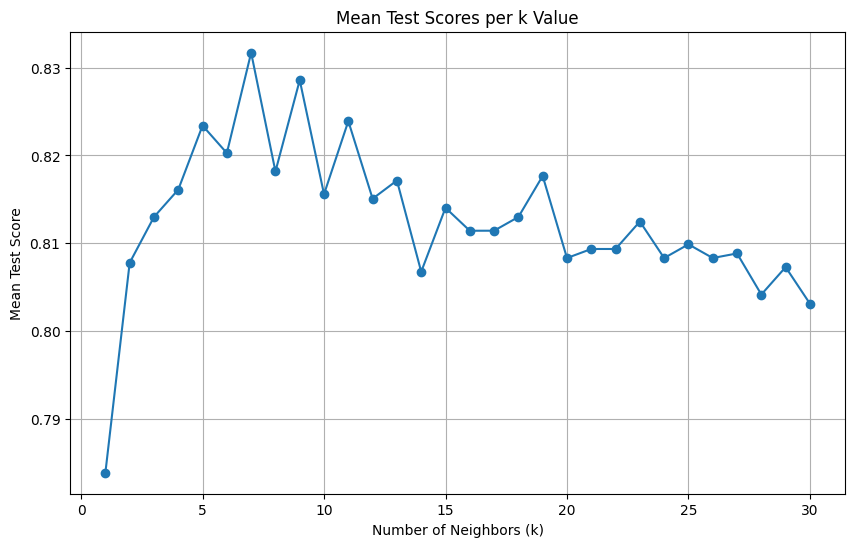

In [9]:
import matplotlib.pyplot as plt

# Get the mean test scores from the grid search results
mean_test_scores = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['param_knn__n_neighbors']

# Plot the mean test scores
plt.figure(figsize=(10, 6))
plt.plot(params, mean_test_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Scores per k Value')
plt.grid(True)
plt.show()


### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

# Use the best estimator from the grid search
best_knn = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_knn.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.89       161
           1       0.76      0.36      0.49        53

    accuracy                           0.81       214
   macro avg       0.79      0.66      0.69       214
weighted avg       0.81      0.81      0.79       214

Confusion Matrix:
[[155   6]
 [ 34  19]]
